# Part 2: Data Wrangling & Feature Engineering

**Executive Summary:** 
Data quality is the primary driver of model performance. This phase involves rigorous data cleaning and feature engineering. Here, we transform raw categorical descriptions into numerical training labels and handle missing information through statistical imputation, ensuring a clean, high-signal input for machine learning algorithms.

**Objectives:**
- Engineer the target variable (Class) by categorizing landing outcomes into binary success/failure labels.
- Address missing values in critical columns like PayloadMass using mean-value imputation.
- Perform exploratory data types conversion to ensure numerical consistency across all features.
- Prepare the core dataframe for statistical analysis and visualization phases.

**Acknowledgments:**
- Original lab structure from IBM Data Science Professional Certificate

## 1) IMPORT LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


## 2) LOAD AND INSPECT DATA

In [12]:
# Load the dataset from previous data collection phase
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv"
df = pd.read_csv(url)

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (90, 17)
Total Records: 90

First 10 rows:


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


## 3) DATA QUALITY ASSESSMENT

In [13]:
# Calculate missing value percentages
print("=== Missing Values Analysis ===")
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing %'] > 0].sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values detected!")

# Identify data types
print("\n=== Data Types ===")
print(df.dtypes)

# Basic statistics
print("\n=== Numerical Features Summary ===")
df.describe()

=== Missing Values Analysis ===
    Column  Missing %
LandingPad      28.89

=== Data Types ===
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

=== Numerical Features Summary ===


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093


## 4) EXPLORATORY DATA ANALYSIS - LAUNCH SITES

=== Launch Site Distribution ===
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


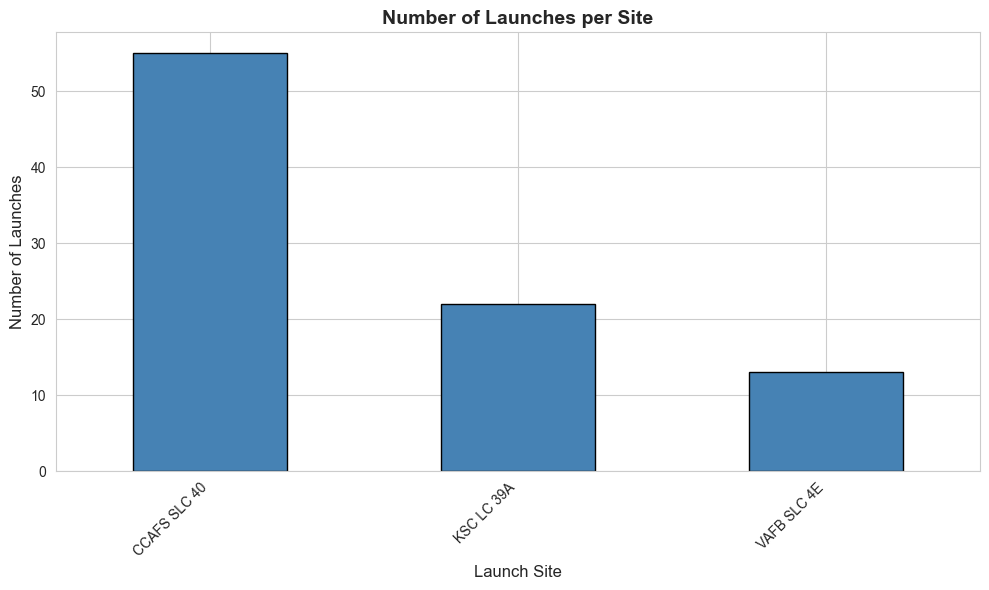

In [14]:
"""
Task 1: Analyze launch site distribution

SpaceX operates from multiple launch facilities:
- CCAFS SLC 40: Cape Canaveral Air Force Station Space Launch Complex 40
- VAFB SLC 4E: Vandenberg Air Force Base Space Launch Complex 4E
- KSC LC 39A: Kennedy Space Center Launch Complex 39A
"""

print("=== Launch Site Distribution ===")
launch_site_counts = df['LaunchSite'].value_counts()
print(launch_site_counts)

# Visualization
plt.figure(figsize=(10, 6))
launch_site_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Launches per Site', fontsize=14, fontweight='bold')
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5) ORBIT TYPE ANALYSIS

=== Orbit Type Distribution ===
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

=== Orbit Distribution (excluding GTO) ===
Orbit
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64


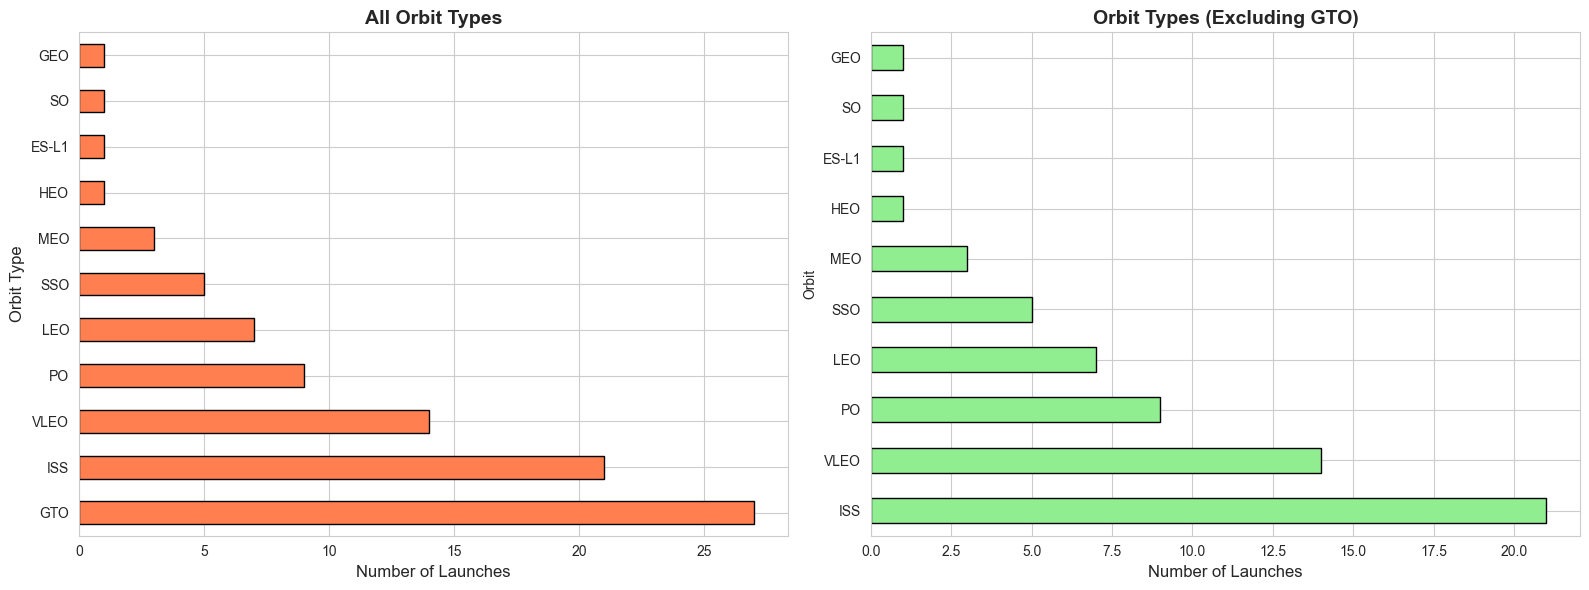

In [15]:
"""
Task 2: Analyze orbit type distribution

Common orbit types in the dataset:
- LEO: Low Earth Orbit (altitude < 2,000 km)
- GTO: Geostationary Transfer Orbit (transfer orbit to GEO)
- ISS: International Space Station missions
- PO: Polar Orbit
- SSO/SO: Sun-Synchronous Orbit
- ES-L1: Earth-Sun Lagrange Point 1
- MEO: Medium Earth Orbit
- GEO: Geostationary Orbit
- HEO: Highly Elliptical Orbit

Note: GTO is excluded from final analysis as it's a transfer orbit
"""

print("=== Orbit Type Distribution ===")
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)

# Filter out GTO for analysis (transfer orbit)
orbit_counts_filtered = orbit_counts[orbit_counts.index != 'GTO']
print("\n=== Orbit Distribution (excluding GTO) ===")
print(orbit_counts_filtered)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All orbits
orbit_counts.plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('All Orbit Types', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Launches', fontsize=12)
axes[0].set_ylabel('Orbit Type', fontsize=12)

# Filtered orbits
orbit_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Orbit Types (Excluding GTO)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Launches', fontsize=12)

plt.tight_layout()
plt.show()

## 6) MISSION OUTCOME ANALYSIS

=== Landing Outcome Distribution ===
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

=== Indexed Landing Outcomes ===
0: True ASDS - 41 launches
1: None None - 19 launches
2: True RTLS - 14 launches
3: False ASDS - 6 launches
4: True Ocean - 5 launches
5: False Ocean - 2 launches
6: None ASDS - 2 launches
7: False RTLS - 1 launches


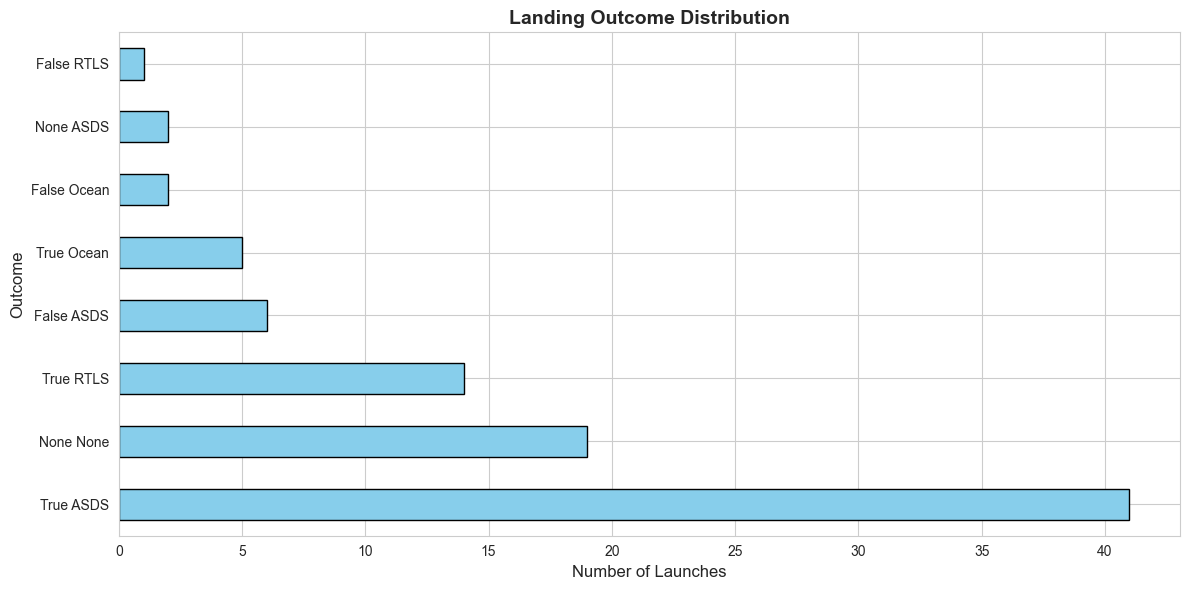

In [16]:
"""
Task 3: Analyze landing outcomes

Landing Outcome Definitions:
- True Ocean: Successfully landed in ocean (controlled)
- False Ocean: Failed to land in ocean
- True RTLS: Successfully landed on ground pad (Return to Launch Site)
- False RTLS: Failed to land on ground pad
- True ASDS: Successfully landed on drone ship (Autonomous Spaceport Drone Ship)
- False ASDS: Failed to land on drone ship
- None ASDS / None None: Landing not attempted or failed
"""

print("=== Landing Outcome Distribution ===")
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

# Display with indices for reference
print("\n=== Indexed Landing Outcomes ===")
for i, outcome in enumerate(landing_outcomes.keys()):
    print(f"{i}: {outcome} - {landing_outcomes[outcome]} launches")

# Visualization
plt.figure(figsize=(12, 6))
landing_outcomes.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Landing Outcome Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Launches', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.tight_layout()
plt.show()

## 7) FEATURE ENGINEERING - CREATE TARGET VARIABLE

=== Unsuccessful Landing Outcomes ===
{'None None', 'False Ocean', 'False ASDS', 'False RTLS', 'None ASDS'}

=== Sample of New 'Class' Column ===
       Outcome  Class
0    None None      0
1    None None      0
2    None None      0
3  False Ocean      0
4    None None      0
5    None None      0
6   True Ocean      1
7   True Ocean      1
8    None None      0
9    None None      0

=== Class Distribution ===
Unsuccessful Landings (Class 0): 30
Successful Landings (Class 1): 60


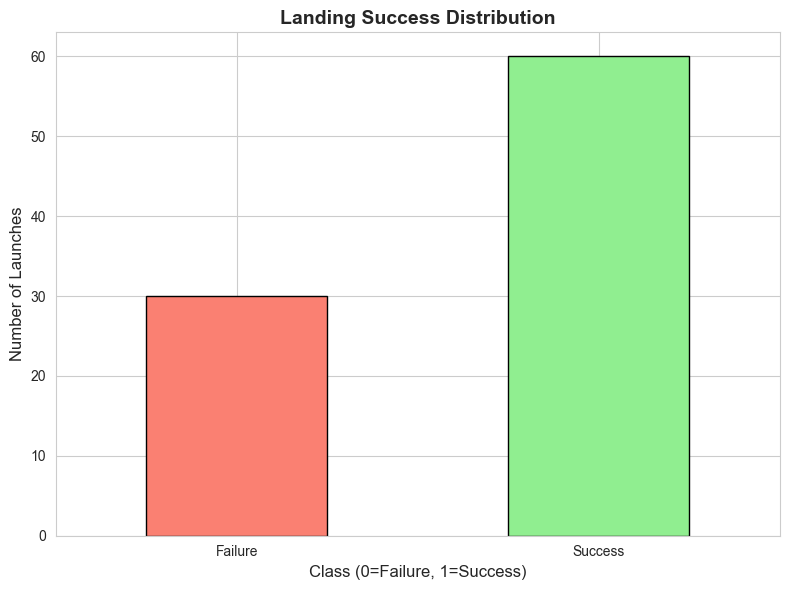

In [17]:
"""
Task 4: Create binary classification label

We'll create a binary target variable 'Class' where:
- Class = 1: Successful landing (first stage recovered)
- Class = 0: Unsuccessful landing (first stage lost)

This transforms the multi-class outcome into a binary classification problem
suitable for machine learning models.
"""

# Define unsuccessful landing outcomes
bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])
print("=== Unsuccessful Landing Outcomes ===")
print(bad_outcomes)

# Create binary classification label using list comprehension
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

# Alternative vectorized approach (more efficient for large datasets)
# landing_class = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

# Add to dataframe
df['Class'] = landing_class

# Verify the new column
print("\n=== Sample of New 'Class' Column ===")
print(df[['Outcome', 'Class']].head(10))

# Check class distribution
print("\n=== Class Distribution ===")
class_dist = df['Class'].value_counts().sort_index()
print(f"Unsuccessful Landings (Class 0): {class_dist[0]}")
print(f"Successful Landings (Class 1): {class_dist[1]}")

# Visualize class balance
plt.figure(figsize=(8, 6))
class_dist.plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.title('Landing Success Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (0=Failure, 1=Success)', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.xticks([0, 1], ['Failure', 'Success'], rotation=0)
plt.tight_layout()
plt.show()

## 8) SUCCESS RATE CALCULATION

In [18]:
# Calculate overall success rate
success_rate = df['Class'].mean()
print(f"\n=== Overall Landing Success Rate ===")
print(f"Success Rate: {success_rate:.2%}")
print(f"Failure Rate: {(1-success_rate):.2%}")

# Success rate by launch site
print("\n=== Success Rate by Launch Site ===")
site_success = df.groupby('LaunchSite')['Class'].agg(['mean', 'count'])
site_success.columns = ['Success_Rate', 'Total_Launches']
site_success['Success_Rate'] = site_success['Success_Rate'].apply(lambda x: f"{x:.2%}")
print(site_success)

# Success rate by orbit type
print("\n=== Success Rate by Orbit Type ===")
orbit_success = df.groupby('Orbit')['Class'].agg(['mean', 'count'])
orbit_success.columns = ['Success_Rate', 'Total_Launches']
orbit_success = orbit_success.sort_values('Success_Rate', ascending=False)
orbit_success['Success_Rate'] = orbit_success['Success_Rate'].apply(lambda x: f"{x:.2%}")
print(orbit_success.head(10))


=== Overall Landing Success Rate ===
Success Rate: 66.67%
Failure Rate: 33.33%

=== Success Rate by Launch Site ===
             Success_Rate  Total_Launches
LaunchSite                               
CCAFS SLC 40       60.00%              55
KSC LC 39A         77.27%              22
VAFB SLC 4E        76.92%              13

=== Success Rate by Orbit Type ===
      Success_Rate  Total_Launches
Orbit                             
ES-L1      100.00%               1
GEO        100.00%               1
HEO        100.00%               1
SSO        100.00%               5
VLEO        85.71%              14
LEO         71.43%               7
PO          66.67%               9
MEO         66.67%               3
ISS         61.90%              21
GTO         51.85%              27


## 9) EXPORT PROCESSED DATA

In [19]:
# Save the processed dataset for next analysis phase
output_filename = "dataset_part_2_processed.csv"
df.to_csv(output_filename, index=False)
print(f"\n✓ Processed data saved to: {output_filename}")

# Display final dataset info
print("\n=== Final Dataset Summary ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")



✓ Processed data saved to: dataset_part_2_processed.csv

=== Final Dataset Summary ===
Shape: (90, 18)
Columns: ['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'Class']

Data types:
FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object


## 10) KEY INSIGHTS SUMMARY

In [20]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM DATA WRANGLING")
print("="*70)
print(f"1. Total Launches Analyzed: {len(df)}")
print(f"2. Overall Success Rate: {df['Class'].mean():.2%}")
print(f"3. Number of Launch Sites: {df['LaunchSite'].nunique()}")
print(f"4. Number of Orbit Types: {df['Orbit'].nunique()}")
print(f"5. Most Common Launch Site: {df['LaunchSite'].value_counts().index[0]}")
print(f"6. Most Common Orbit: {df['Orbit'].value_counts().index[0]}")
print("\nDataset is now ready for machine learning model development!")
print("="*70)


KEY INSIGHTS FROM DATA WRANGLING
1. Total Launches Analyzed: 90
2. Overall Success Rate: 66.67%
3. Number of Launch Sites: 3
4. Number of Orbit Types: 11
5. Most Common Launch Site: CCAFS SLC 40
6. Most Common Orbit: GTO

Dataset is now ready for machine learning model development!
